# EDA y Preprocesamiento
## Universidad del Valle de Guatemala <br> Facultad de Ingeniería
#### Departamento de Ciencias de la Computación <br> Deep Learning y Sistemas Inteligentes - Sección 20 <br><br> Jeyner Arango 201106 <br> Cristian Laynez 201281


In [337]:
# Importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importar todos los datos y hacer un mini procesamiento

In [338]:
df_books = pd.read_csv('./data/Books.csv')
df_books.head()

C:\Users\crist\AppData\Local\Temp\ipykernel_7700\396208682.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_books = pd.read_csv('./data/Books.csv')


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [339]:
# Vamos a eliminar las variables de Image-URL ya que en este escenario no nos va a servir
del df_books["Image-URL-S"]
del df_books["Image-URL-M"]
del df_books["Image-URL-L"]

In [340]:
df_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [341]:
df_users = pd.read_csv("./data/Users.csv")
df_users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [342]:
df_ratings = pd.read_csv("./data/Ratings.csv")
df_ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [343]:
df_books[df_books.duplicated()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher


In [344]:
df_users[df_users.duplicated()]

,User-ID,Location,Age


In [345]:
df_ratings[df_ratings.duplicated()]

,User-ID,ISBN,Book-Rating


Al parecer no hay data duplicada entre las filas de cada data set

In [346]:
df_books["Book-Title"].value_counts()

Book-Title
Selected Poems                                                                                                                    27
Little Women                                                                                                                      24
Wuthering Heights                                                                                                                 21
The Secret Garden                                                                                                                 20
Dracula                                                                                                                           20
                                                                                                                                  ..
What Every Kid Should Know                                                                                                         1
The Seventh Enemy (A Brady Coyne Mystery)                 

In [347]:
print(f"Cantidad de datos en Books: {len(df_books)}")
print(f"Cantidad de datos en Usuarios: {len(df_users)}")
print(f"Cantidad de datos en Ratings: {len(df_ratings)}")

Cantidad de datos en Books: 271360
Cantidad de datos en Usuarios: 278858
Cantidad de datos en Ratings: 1149780


### Ahora vamos a llevar a cabo la verificacion de tipo de variable en cada una de las columans de cada data set

In [348]:
labels_books = ["ISBN", "Book-Title", "Book-Author", "Year-Of-Publication", "Publisher"]
for l in labels_books: print(f"=> {l} : {df_books[l].dtype}")

=> ISBN : object
=> Book-Title : object
=> Book-Author : object
=> Year-Of-Publication : object
=> Publisher : object


In [349]:
labels_users = ["User-ID", "Location", "Age"]
for l in labels_users: print(f"=> {l} : {df_users[l].dtype}")

=> User-ID : int64
=> Location : object
=> Age : float64


In [350]:
labels_ratings = ["User-ID", "ISBN", "Book-Rating"]
for l in labels_ratings: print(f"=> {l} : {df_ratings[l].dtype}")

=> User-ID : int64
=> ISBN : object
=> Book-Rating : int64


In [351]:
# Vamos a convertir los datos en sus correspondientes tipos de datos
df_books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [352]:
df_books["ISBN"] = df_books["ISBN"].astype(str)
df_books["Book-Title"] = df_books["Book-Title"].astype(str)
df_books["Book-Author"] = df_books["Book-Author"].astype(str)
df_books["Publisher"] = df_books["Publisher"].astype(str)

# Se borraran los str que se encontraron
df_books['Year-Of-Publication'] = df_books['Year-Of-Publication'].replace("DK Publishing Inc", -1)
df_books['Year-Of-Publication'] = df_books['Year-Of-Publication'].replace("Gallimard", -1)

df_books["Year-Of-Publication"] = df_books["Year-Of-Publication"].astype(int)

In [353]:
df_books["ISBN"] = df_books["ISBN"].fillna("")
df_books["Book-Title"] = df_books["Book-Title"].fillna("")
df_books["Book-Author"] = df_books["Book-Author"].fillna("")
df_books["Year-Of-Publication"] = df_books["Year-Of-Publication"].fillna(-1)
df_books["Publisher"] = df_books["Publisher"].fillna("")

df_users["Location"] = df_users["Location"].fillna("")
df_users["Age"] = df_users["Age"].fillna(-1)

In [354]:
labels_books = ["ISBN", "Book-Title", "Book-Author", "Year-Of-Publication", "Publisher"]
for l in labels_books: print(f"=> {l} : {df_books[l].dtype}")

=> ISBN : object
=> Book-Title : object
=> Book-Author : object
=> Year-Of-Publication : int32
=> Publisher : object


In [355]:
labels_users = ["User-ID", "Location", "Age"]
for l in labels_users: print(f"=> {l} : {df_users[l].dtype}")

=> User-ID : int64
=> Location : object
=> Age : float64


In [356]:
labels_ratings = ["User-ID", "ISBN", "Book-Rating"]
for l in labels_ratings: print(f"=> {l} : {df_ratings[l].dtype}")

=> User-ID : int64
=> ISBN : object
=> Book-Rating : int64


### Ahora se llevara a cabo un análisis exploratorio de los tres data sets

#### Data Set de los libros

In [357]:
df_books.describe()

,Year-Of-Publication
count,271360.000000
mean,1959.739140
std,258.075159
min,-1.000000
25%,1989.000000
50%,1995.000000
75%,2000.000000
max,2050.000000


In [358]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271360 non-null  object
 3   Year-Of-Publication  271360 non-null  int32 
 4   Publisher            271360 non-null  object
dtypes: int32(1), object(4)
memory usage: 9.3+ MB


In [359]:
# Numero de libros unicos
print(f"Numero de libros unicos: {df_books['ISBN'].nunique()}")

Numero de libros unicos: 271360


Todo indica que esta en orden el data set de los libros.

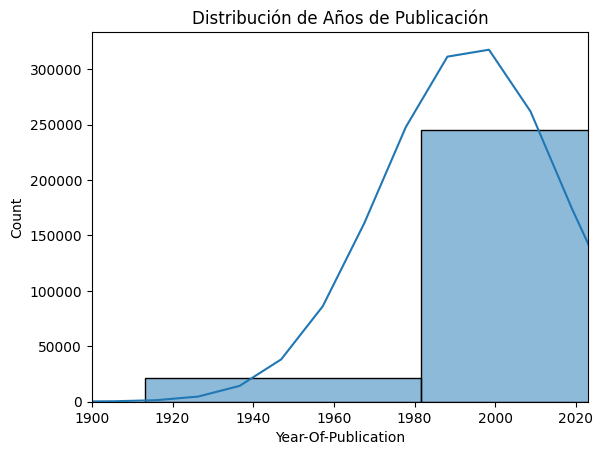

In [360]:
sns.histplot(df_books['Year-Of-Publication'], bins=30, kde=True)
plt.title('Distribución de Años de Publicación')
plt.xlim(1900, 2023)
plt.show()

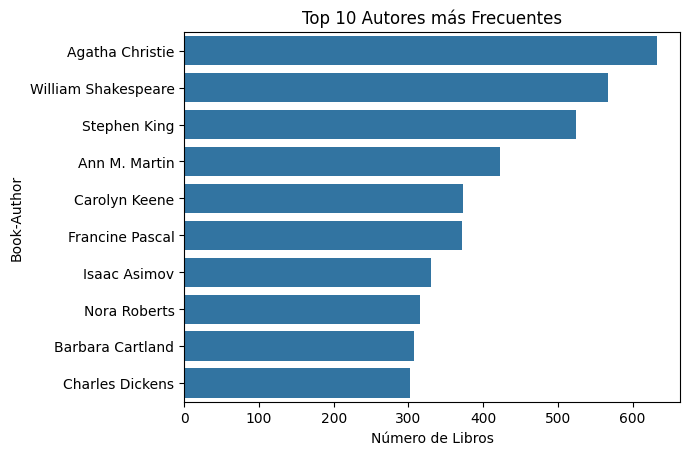

In [361]:
# Visualización de los 10 autores más frecuentes
top_authors = df_books['Book-Author'].value_counts().head(10)
sns.barplot(x=top_authors.values, y=top_authors.index)
plt.title('Top 10 Autores más Frecuentes')
plt.xlabel('Número de Libros')
plt.show()

#### Data Set de los Usuarios

In [362]:
# Resumen estadistico
df_users.describe()

,User-ID,Age
count,278858.00000,278858.000000
mean,139429.50000,20.551015
std,80499.51502,20.773045
min,1.00000,-1.000000
25%,69715.25000,-1.000000
50%,139429.50000,22.000000
75%,209143.75000,35.000000
max,278858.00000,244.000000


In [363]:
# Informacion general del data set
df_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       278858 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [364]:
print(f"Numero de usuarios unicos: {df_users['User-ID'].nunique()}")
print(f"Tamanio del dataset: {len(df_users)}")

Numero de usuarios unicos: 278858
Tamanio del dataset: 278858


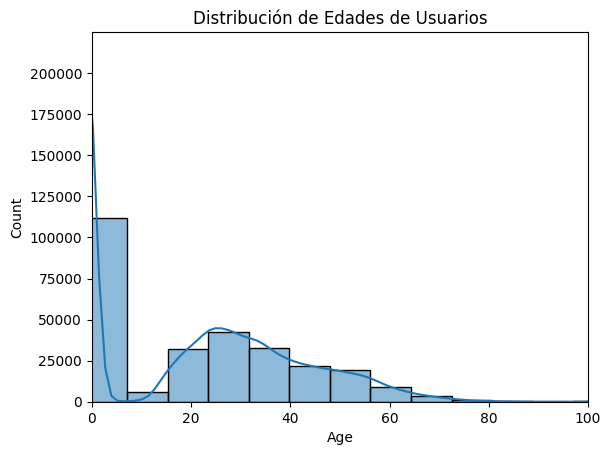

In [365]:
sns.histplot(df_users['Age'].dropna(), bins=30, kde=True)
plt.title('Distribución de Edades de Usuarios')
plt.xlim(0, 100)
plt.show()

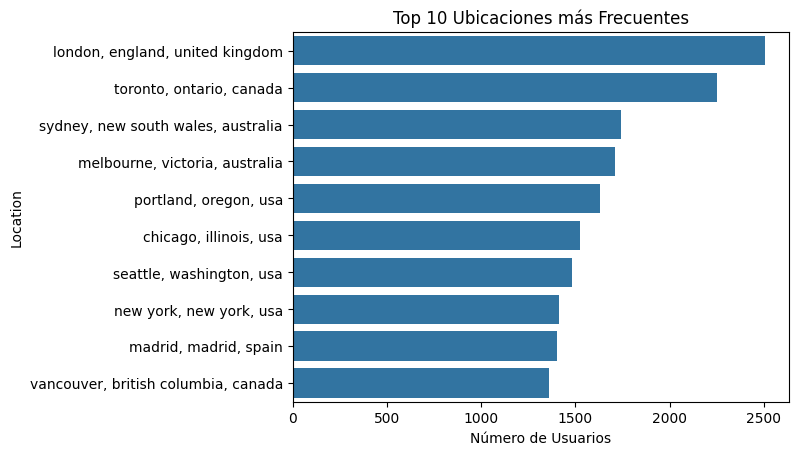

In [366]:
top_locations = df_users['Location'].value_counts().head(10)
sns.barplot(x=top_locations.values, y=top_locations.index)
plt.title('Top 10 Ubicaciones más Frecuentes')
plt.xlabel('Número de Usuarios')
plt.show()

#### Data Set de los Ratings

In [367]:
# Resumen estadistico
df_ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


In [368]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [369]:
print(f"Numero de calificaciones unicas: {df_ratings['Book-Rating'].nunique()}")

Numero de calificaciones unicas: 11


In [370]:
df_ratings["Book-Rating"].value_counts()

Book-Rating
0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: count, dtype: int64

Lo que sucede con el rating es que se califica desde 0 hasta 10 como nota máxima.

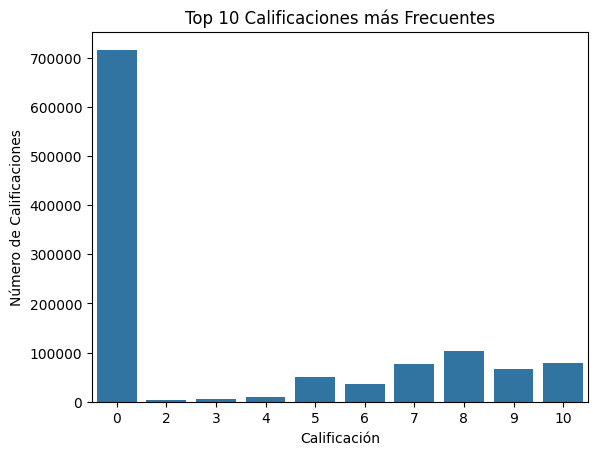

In [371]:
top_ratings = df_ratings['Book-Rating'].value_counts().head(10)
sns.barplot(x=top_ratings.index, y=top_ratings.values)
plt.title('Top 10 Calificaciones más Frecuentes')
plt.xlabel('Calificación')
plt.ylabel('Número de Calificaciones')
plt.show()

### Se llevara a cabo el merge de todos los datasets para tenerlo en un solo data set

In [372]:
# Aplicar preprocesamiento
ratings = df_ratings.merge(df_books[['ISBN', 'Book-Title']], on='ISBN', how='left')
data_frame = ratings.merge(df_users[['User-ID', 'Location', 'Age']], on='User-ID', how='left')
data_frame.head()

,User-ID,ISBN,Book-Rating,Book-Title,Location,Age
0,276725,034545104X,0,Flesh Tones: A Novel,"tyler, texas, usa",-1.0
1,276726,0155061224,5,Rites of Passage,"seattle, washington, usa",-1.0
2,276727,0446520802,0,The Notebook,"h, new south wales, australia",16.0
3,276729,052165615X,3,Help!: Level 1,"rijeka, n/a, croatia",16.0
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,"rijeka, n/a, croatia",16.0


In [373]:
data_frame

,User-ID,ISBN,Book-Rating,Book-Title,Location,Age
0,276725,034545104X,0,Flesh Tones: A Novel,"tyler, texas, usa",-1.0
1,276726,0155061224,5,Rites of Passage,"seattle, washington, usa",-1.0
2,276727,0446520802,0,The Notebook,"h, new south wales, australia",16.0
3,276729,052165615X,3,Help!: Level 1,"rijeka, n/a, croatia",16.0
4,276729,0521795028,6,The Amsterdam Connection : Level 4 (Cambridge ...,"rijeka, n/a, croatia",16.0
...,...,...,...,...,...,...
1149775,276704,1563526298,9,Get Clark Smart : The Ultimate Guide for the S...,"cedar park, texas, usa",-1.0
1149776,276706,0679447156,0,Eight Weeks to Optimum Health: A Proven Progra...,"quebec, quebec, canada",18.0
1149777,276709,0515107662,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),"mannington, west virginia, usa",38.0
1149778,276721,0590442449,10,Fourth Grade Rats,"providence, rhode island, usa",14.0


In [374]:
print(f"Cantidad de registros con toda la data unida: {len(data_frame)}")

Cantidad de registros con toda la data unida: 1149780


In [375]:
from sklearn.preprocessing import LabelEncoder
# Se procedera a realizar codificacion de etiquetas
label_encoder = LabelEncoder()
data_frame['ISBN'] = label_encoder.fit_transform(data_frame['ISBN'])
data_frame['User-ID'] = label_encoder.fit_transform(data_frame['User-ID'])
data_frame['Location'] = label_encoder.fit_transform(data_frame['Location'])

In [376]:
data_frame.head()

,User-ID,ISBN,Book-Rating,Book-Title,Location,Age
0,104433,57188,0,Flesh Tones: A Novel,23539,-1.0
1,104434,29750,5,Rites of Passage,20745,-1.0
2,104435,107392,0,The Notebook,9399,16.0
3,104436,127253,3,Help!: Level 1,19243,16.0
4,104436,127287,6,The Amsterdam Connection : Level 4 (Cambridge ...,19243,16.0


In [377]:
data_frame

,User-ID,ISBN,Book-Rating,Book-Title,Location,Age
0,104433,57188,0,Flesh Tones: A Novel,23539,-1.0
1,104434,29750,5,Rites of Passage,20745,-1.0
2,104435,107392,0,The Notebook,9399,16.0
3,104436,127253,3,Help!: Level 1,19243,16.0
4,104436,127287,6,The Amsterdam Connection : Level 4 (Cambridge ...,19243,16.0
...,...,...,...,...,...,...
1149775,104428,256876,9,Get Clark Smart : The Ultimate Guide for the S...,4341,-1.0
1149776,104429,164861,0,Eight Weeks to Optimum Health: A Proven Progra...,18744,18.0
1149777,104430,123711,10,The Sherbrooke Bride (Bride Trilogy (Paperback)),13796,38.0
1149778,104431,145625,10,Fourth Grade Rats,18620,14.0


In [378]:
data_frame.to_csv("./data/_AllData.csv", index=False)

In [379]:
# Probando la leida de datos
df_check = pd.read_csv("./data/_AllData.csv")
df_check.head()

,User-ID,ISBN,Book-Rating,Book-Title,Location,Age
0,104433,57188,0,Flesh Tones: A Novel,23539,-1.0
1,104434,29750,5,Rites of Passage,20745,-1.0
2,104435,107392,0,The Notebook,9399,16.0
3,104436,127253,3,Help!: Level 1,19243,16.0
4,104436,127287,6,The Amsterdam Connection : Level 4 (Cambridge ...,19243,16.0


In [380]:
print(f"Cantidad de datos del dataset completo y mergeado: {len(df_check)}")

Cantidad de datos del dataset completo y mergeado: 1149780


Todo en orden, si es neceario se optara por "samplear" o quitar mas datos de este nuevo data set o samplear el data frame de libros.